# Modelo de predição para as notas de matemática do ENEM 2016
Desafio Codenation:

O desafio consiste em criar um modelo que faça a predição da nota de matemática do enem com base nas variáveis disponiveis do participante da prova.
Como o alvo, nota de matemática, trata-se de uma variável contínua iremos utilizar a classe de modelos de regressao supervisionados em Machine Learning.

Nessa solução iremos utilizar: Random Forest, Gradient Boosting , Support Vector Machine e Regressão Linear com penalização Rigde

As etapas desse projeto estão dividas em:

1) Importação e leitura do dataframe disponibilizado pela codenation

2) Realização do de-para entre o dicionário de dados e a base disponibilizada

3) Data engineering na qual vamos tratar variáveis categoricas e valores nulos

4) Trabalhando com as correlações entre as variáveis continuas

5) Análise exploratória

6) Feature Selection

7) Modelagem

8) Avaliação dos resultados e submissão do desafio

### 1) Importando bibliotecas

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns #Gráfico
import matplotlib.pyplot as plt #Gráfico
import sklearn
from sklearn.preprocessing import OneHotEncoder #transformar categoricas em dummies
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor #Modelo essembles
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV #divisão da base
from sklearn.feature_selection import f_regression,RFECV,SelectKBest,RFE,SelectFromModel #Feature selection
from sklearn.metrics import r2_score, mean_squared_error #Métricas de avaliação
from sklearn.preprocessing import StandardScaler #padronizacao
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor #Modelos ensemble 
from sklearn.svm import SVR #Modelo de Support vector machine
from sklearn.linear_model import Ridge #Regressão Ridge
import warnings
warnings.filterwarnings('ignore') #tirar warnings 

### Lendo e visualizando o dataframe

In [2]:
#Lendo dataframe
df = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

#Adicionando um número para identificar a base de teste ao decorrer desse código
teste['NU_NOTA_MT'] = 99999

In [3]:
#Visualizando dados
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

df2 = df[list(teste.columns)]
df2 = pd.concat([teste,df2],sort=False)
df2.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A,99999.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A,99999.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A,99999.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A,99999.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A,99999.0


### Dropando colunas que não terão influência no modelo

In [4]:
print("Visualizando colunas que vão ser apagadas do dataframe")
print("------------------------------------------------------")
df2[['CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT']].head()

Visualizando colunas que vão ser apagadas do dataframe
------------------------------------------------------


,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT
0,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a
1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85
2,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01
3,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf
4,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910


In [5]:
#Finalizando a exclusão das colunas
df2 = df2.drop(columns=['CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT'],axis=1)

### 2) Realização do de-para com o dicionário de dados
O dicionário está disponível em: https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip

In [6]:
#Renomeando colunas para melhor intepretabilidade

df2.rename(columns={'Q001':'serie_pai_estudou',
           'Q002':'serie_mae_estudou',
           'Q005':'quantidade_pessoas_residencia',
           'Q006':'renda_familiar',
           'Q024':'computador_em_casa',
           'Q025':'acesso_internet',
           'Q026':'trabalha_ou_trabalhou',
           'Q027':'idade_comecou_trabalhar',
           'Q047':'escola_ensino_medio'},inplace=True)

#######################################################
serie_pai = {'A': 1,
            'B': 2 ,
            'C': 3,
            'D': 4,
            'E': 5,
            'F': 6,
            'G': 7,
            'H':0 }

df2['serie_pai_estudou'] = df2['serie_pai_estudou'].map(serie_pai)
#######################################################
serie_mae = {'A': 1,
            'B': 2 ,
            'C': 3,
            'D': 4,
            'E': 5,
            'F': 6,
            'G': 7,
            'H':0 }

df2['serie_mae_estudou'] = df2['serie_mae_estudou'].map(serie_mae)
#######################################################
renda_familiar = {'A': 'nenhuma_renda',
                'B':'0 - 880' ,
                'C': '880 - 1760',
                'D': '880 - 1760',
                'E': '1760 - 2640',
                'F': '1760 - 2640',
                'G': '2640 - 4400',
                'H': '2640 - 4400' ,
                'I': '4400 - 6160',
                'J': '4400 - 6160',
                'K': '6160 - 8800',
                'L': '6160 - 8800',
                'M': '6160 - 8800',
                'N': '> 8800',
                'O': '> 8800',
                'P': '> 8800',
                'Q': '> 8800'}

df2['renda_familiar'] = df2['renda_familiar'].map(renda_familiar)
#######################################################
computador = {'A': 0,
            'B': 1 ,
            'C': 2,
            'D': 3,
            'E': 4}

df2['computador_em_casa'] = df2['computador_em_casa'].map(computador)

######################################################
acesso_net = {'A': 0,
            'B': 1 }

df2['acesso_internet'] = df2['acesso_internet'].map(acesso_net)
#######################################################
trabalha_trabalhou = {'A': 'nunca',
            'B': 'sim_nao_trabalha_atualmente' ,
            'C': 'sim_trabalhando_atualmente'}
df2['trabalha_ou_trabalhou'] = df2['trabalha_ou_trabalhou'].map(trabalha_trabalhou)

##########################################################
idade_comecou_trab = {'A': 13,
                'B':14,
                'C': 15,
                'D': 16,
                'E': 17,
                'F': 18,
                'G': 19,
                'H': 20 ,
                'I': 21,
                'J': 22,
                'K': 23,
                'L': 24,
                'M': 35}

df2['idade_comecou_trabalhar'] = df2['idade_comecou_trabalhar'].map(idade_comecou_trab)
#########################################################
escola_em= {'A': 'publica',
                'B':'publica_e_privada_com_bolsa',
                'C': 'publica_e_privada_sem_bolsa',
                'D': 'privada_sem_bolsa',
                'E': 'privada_com_bolsa'}

df2['escola_ensino_medio'] = df2['escola_ensino_medio'].map(escola_em)
##########################################################
raca = {0: 'nao_declaraado',
        1: 'branco' ,
        2: 'preto',
        3: 'parda',
        4: 'amarela',
        5: 'indigena',
        6: 'nao_dipoe_informacao'}

df2['TP_COR_RACA'] = df2['TP_COR_RACA'].map(raca)

##########################################

nacionalidade = {0: 'nao_informado',
                1: 'brasileiro' ,
                2: 'brasileiro_naturalizado',
                3: 'estrangeiro',
                4: 'brasileiro_nato_nascido_exterior'}

df2['TP_NACIONALIDADE'] = df2['TP_NACIONALIDADE'].map(nacionalidade)

##########################################

conclusao_ensino_medio = {1: 'concluido' ,
                          2: 'conclusao_neste_ano',
                          3: 'conclusao_apos_esse_ano',
                          4: 'nao_concluido_e_nao_cursando'}

df2['TP_ST_CONCLUSAO'] = df2['TP_ST_CONCLUSAO'].map(conclusao_ensino_medio)

##########################################
ensino = {1: 'ensino_regular' ,
          2: 'educacao_especial',
          3: 'eja'}

df2['TP_ENSINO'] = df2['TP_ENSINO'].map(ensino)

##############################################

tipo_escola = {1: 'federal' ,
              2: 'estadual',
              3: 'municipal',
              4: 'privada'}

df2['TP_DEPENDENCIA_ADM_ESC'] = df2['TP_DEPENDENCIA_ADM_ESC'].map(tipo_escola)

##########################################
lingua = {0: 'ingles' ,
          1: 'espanhol',}

df2['TP_LINGUA'] = df2['TP_LINGUA'].map(lingua)

##########################################
status_redacao = {1: 'sem_problemas' ,
                2: 'anulada',
                3: 'copia_texto',
                4: 'em_branco',
                5: 'fere_direitos_humanos',
                6: 'fuga_tema',
                7: 'nao_tendimento_ao_tipo',
                8: 'texto_insuficiente',
                9: 'parte_desconectada'}

df2['TP_STATUS_REDACAO'] = df2['TP_STATUS_REDACAO'].map(status_redacao)


###########################
ano_con = {0:0,
        1: 2015 ,
        2: 2014,
        3: 2013,
        4: 2012,
        5: 2011,
        6: 2010,
        7: 2009,
        8: 2008,
        9: 2007}

df2['TP_ANO_CONCLUIU'] = df2['TP_ANO_CONCLUIU'].map(ano_con)
############################
escol = {
        1: 'na' ,
        2: 'publica',
        3: 'privada',
        4: 'exterior'}

df2['TP_ESCOLA'] = df2['TP_ESCOLA'].map(escol)

############################
dp_adm = {
        1: 'federal' ,
        2: 'estadual',
        3: 'municipal',
        4: 'privada'}

df2['TP_DEPENDENCIA_ADM_ESC'] = df2['TP_DEPENDENCIA_ADM_ESC'].map(dp_adm)

print('Visualizando o dataframe após realização do de-para com o dicionário de dados')
print('-----------------------------------------------------------------------------')
df2.head(3)

Visualizando o dataframe após realização do de-para com o dicionário de dados
-----------------------------------------------------------------------------


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,serie_pai_estudou,serie_mae_estudou,renda_familiar,computador_em_casa,acesso_internet,trabalha_ou_trabalhou,idade_comecou_trabalhar,escola_ensino_medio,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,parda,brasileiro,concluido,2011.0,na,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,ingles,sem_problemas,120.0,80.0,80.0,100.0,40.0,420.0,2,1,880 - 1760,0,0,sim_trabalhando_atualmente,15.0,publica,99999.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,parda,brasileiro,concluido,2008.0,na,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,espanhol,sem_problemas,120.0,120.0,120.0,120.0,100.0,580.0,5,2,880 - 1760,1,1,sim_nao_trabalha_atualmente,18.0,publica,99999.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,branco,brasileiro,conclusao_neste_ano,0.0,publica,eja,0,NaN,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,ingles,sem_problemas,80.0,40.0,40.0,80.0,80.0,320.0,5,5,880 - 1760,1,1,nunca,NaN,publica,99999.0


### 3) Data Engineering 

### Realizando o processo de OneHotEncoder que irá transformar variáveis categoricas em dummies (0,1)

In [7]:
from category_encoders.one_hot import OneHotEncoder
colunas_binarizar = ['SG_UF_RESIDENCIA',
                     'TP_SEXO',
                     'TP_COR_RACA',
                     'TP_NACIONALIDADE',
                     'TP_ST_CONCLUSAO',
                     'TP_ANO_CONCLUIU',
                     'TP_ESCOLA',
                     'TP_ENSINO',
                     'TP_LINGUA',
                     'TP_DEPENDENCIA_ADM_ESC',
                     'TP_STATUS_REDACAO',
                     'serie_pai_estudou',
                     'serie_mae_estudou',
                     'renda_familiar',
                     'computador_em_casa',
                     'acesso_internet',
                     'trabalha_ou_trabalhou',
                     'escola_ensino_medio']

dummies = OneHotEncoder(cols= colunas_binarizar,use_cat_names=True)
dummies.fit(df2)
df3 = dummies.transform(df2)

print('Visualizando o dataframe após realização do OneHotEncoder')

df3.head()

Visualizando o dataframe após realização do OneHotEncoder


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_TO,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_RR,NU_IDADE,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_parda,TP_COR_RACA_branco,TP_COR_RACA_preto,TP_COR_RACA_amarela,TP_COR_RACA_nao_declaraado,TP_COR_RACA_indigena,TP_NACIONALIDADE_brasileiro,TP_NACIONALIDADE_brasileiro_naturalizado,TP_NACIONALIDADE_brasileiro_nato_nascido_exterior,TP_NACIONALIDADE_nao_informado,TP_NACIONALIDADE_estrangeiro,TP_ST_CONCLUSAO_concluido,TP_ST_CONCLUSAO_conclusao_neste_ano,TP_ST_CONCLUSAO_conclusao_apos_esse_ano,TP_ST_CONCLUSAO_nao_concluido_e_nao_cursando,TP_ANO_CONCLUIU_2011.0,TP_ANO_CONCLUIU_2008.0,TP_ANO_CONCLUIU_0.0,TP_ANO_CONCLUIU_2015.0,TP_ANO_CONCLUIU_2014.0,TP_ANO_CONCLUIU_nan,TP_ANO_CONCLUIU_2010.0,TP_ANO_CONCLUIU_2012.0,TP_ANO_CONCLUIU_2013.0,TP_ANO_CONCLUIU_2007.0,TP_ANO_CONCLUIU_2009.0,TP_ESCOLA_na,TP_ESCOLA_publica,TP_ESCOLA_privada,TP_ESCOLA_exterior,TP_ENSINO_nan,TP_ENSINO_eja,TP_ENSINO_ensino_regular,TP_ENSINO_educacao_especial,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC_nan,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA_ingles,TP_LINGUA_espanhol,TP_STATUS_REDACAO_sem_problemas,TP_STATUS_REDACAO_nan,TP_STATUS_REDACAO_em_branco,TP_STATUS_REDACAO_fuga_tema,TP_STATUS_REDACAO_parte_desconectada,TP_STATUS_REDACAO_nao_tendimento_ao_tipo,TP_STATUS_REDACAO_texto_insuficiente,TP_STATUS_REDACAO_anulada,TP_STATUS_REDACAO_fere_direitos_humanos,TP_STATUS_REDACAO_copia_texto,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,serie_pai_estudou_2.0,serie_pai_estudou_5.0,serie_pai_estudou_0.0,serie_pai_estudou_4.0,serie_pai_estudou_3.0,serie_pai_estudou_6.0,serie_pai_estudou_7.0,serie_pai_estudou_1.0,serie_mae_estudou_1.0,serie_mae_estudou_2.0,serie_mae_estudou_5.0,serie_mae_estudou_0.0,serie_mae_estudou_3.0,serie_mae_estudou_4.0,serie_mae_estudou_6.0,serie_mae_estudou_7.0,renda_familiar_880 - 1760,renda_familiar_2640 - 4400,renda_familiar_0 - 880,renda_familiar_1760 - 2640,renda_familiar_6160 - 8800,renda_familiar_> 8800,renda_familiar_4400 - 6160,renda_familiar_nenhuma_renda,computador_em_casa_0.0,computador_em_casa_1.0,computador_em_casa_2.0,computador_em_casa_3.0,computador_em_casa_4.0,acesso_internet_0.0,acesso_internet_1.0,trabalha_ou_trabalhou_sim_trabalhando_atualmente,trabalha_ou_trabalhou_sim_nao_trabalha_atualmente,trabalha_ou_trabalhou_nunca,idade_comecou_trabalhar,escola_ensino_medio_publica,escola_ensino_medio_privada_sem_bolsa,escola_ensino_medio_publica_e_privada_sem_bolsa,escola_ensino_medio_publica_e_privada_com_bolsa,escola_ensino_medio_privada_com_bolsa,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,1,0,1,0,0,0,0,0,0,0,0,0,120.0,80.0,80.0,100.0,40.0,420.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,15.0,1,0,0,0,0,99999.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,0,1,1,0,0,0,0,0,0,0,0,0,120.0,120.0,120.0,120.0,100.0,580.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,18.0,1,0,0,0,0,99999.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Visualizando os dados nulos do dataframe

In [8]:
missing = pd.DataFrame({'types':df3.dtypes, 'percentual_nulo': df3.isna().sum()/len(df3)*100})
missing = missing[missing['percentual_nulo'] > 0]
missing.sort_values(by='percentual_nulo', ascending=False)

,types,percentual_nulo
idade_comecou_trabalhar,float64,53.867584
NU_NOTA_LC,float64,26.199060
NU_NOTA_COMP1,float64,26.199060
NU_NOTA_COMP2,float64,26.199060
NU_NOTA_COMP3,float64,26.199060
NU_NOTA_COMP4,float64,26.199060
NU_NOTA_COMP5,float64,26.199060
NU_NOTA_REDACAO,float64,26.199060
NU_NOTA_CN,float64,24.707746
NU_NOTA_CH,float64,24.707746


### Tratando os dados nulos
Para os valores nulos nas notas das provas, vamos utilizar a presença para determinar se o nulo é uma nota zero ou se é falha no preenchimento dos dados, com isso vamos utilizar as seguintes variáveis:

NU_NOTA_LC - Nota da prova de Linguagens e Códigos

NU_NOTA_REDACAO - Nota da prova de Redação

NU_NOTA_CN - Nota da prova de Ciências da Natureza

NU_NOTA_CH - Nota da prova de Ciências Humanas

NU_NOTA_MT - Nota da prova de Matematica e suas tecnologias

TP_PRESENCA_LC - Presença na prova de Linguagens e Códigos

TP_PRESENCA_CH - Presença na prova de Ciências Humanas

TP_PRESENCA_CN - Presença na prova de Ciências da Natureza

Vale salientar que no ano de 2016 a prova do enem foi feita em dois dias, sendo o primeiro dia as provas de 
Ciências da Natureza e Ciências Humanas e no segundo dia as provas de Linguagens e Códigos,Redação e Matematica.

Dessa forma, os participantes que obtiveram falta no primeiro dia atribuiremos o valor 0 para as variaveis
NU_NOTA_CN, NU_NOTA_CH e para os participantes que faltaram no segundo dia atribuiremos o valor de 0 para as
variaveis NU_NOTA_MT, NU_NOTA_REDACAO e NU_NOTA_LC.

Para o restantes das variaveis continuas iremos inputar a medianas para os valores nulos.


In [9]:
#Faltou no segundo dia? se sim zera as notas do dia no dia

#Presença Lnguagens
df3['NU_NOTA_MT'] = np.where(df3.TP_PRESENCA_LC==0,0,df3['NU_NOTA_MT'])
df3['NU_NOTA_REDACAO'] = np.where(df3.TP_PRESENCA_LC==0,0,df3['NU_NOTA_REDACAO'])
df3['NU_NOTA_LC'] = np.where(df3.TP_PRESENCA_LC==0,0,df3['NU_NOTA_LC'])

                                                                                                                         
#Faltou no primeiro dia? se sim zera as notas do primeiro dia de enem                                                               
df3['NU_NOTA_CN'] = np.where(df3.TP_PRESENCA_CH==0,0,df3['NU_NOTA_CN'])   
df3['NU_NOTA_CH'] = np.where(df3.TP_PRESENCA_CH==0,0,df3['NU_NOTA_CH'])  
                                                              
df3['NU_NOTA_CN'] = np.where(df3.TP_PRESENCA_CN==0,0,df3['NU_NOTA_CN'])   
df3['NU_NOTA_CH'] = np.where(df3.TP_PRESENCA_CN==0,0,df3['NU_NOTA_CH'])                                                               

In [10]:
#Input da medianas no valores nulos 
input_median = list(missing.index)

for i in input_median:
    df3[i] = df3[i].fillna(df3[i].median())
df3['idade_comecou_trabalhar'] = df3['idade_comecou_trabalhar'].fillna(df3['idade_comecou_trabalhar'].median())

### 4) Verificando correlações das variáveis numéricas da base de treino

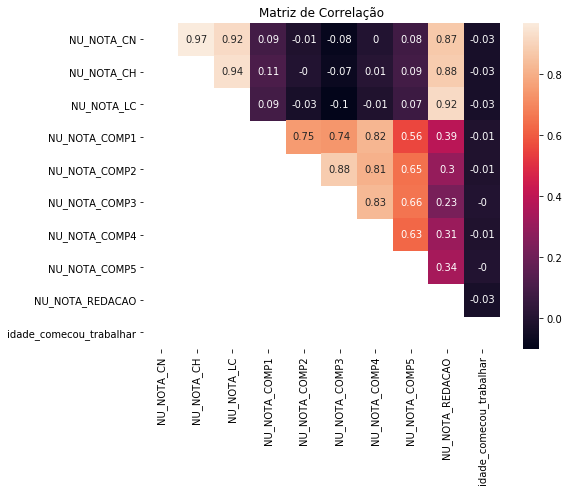

In [11]:
#Criando um objeto que rece a matriz de correlação
numericas = df3[df3['NU_NOTA_MT']!=99999].select_dtypes('float64')
numericas = numericas.drop(columns=['NU_NOTA_MT'])
correlação = round(numericas.corr(),2)
triangulo = correlação.where(np.triu(np.ones(correlação.shape), k=1).astype(np.bool))

#Criando uma representação gráfica para a matriz de correlação
sns.heatmap(triangulo, 
            xticklabels=correlação.columns.values,
            yticklabels=correlação.columns.values,annot=True)

plt.title('Matriz de Correlação')
plt.gcf().set_size_inches(8,6)
plt.show()

### Trabalhando com o problema de multicolinearidade
Multicolinearidade consiste quando temos alta correlação entre as variáveis explicativas ou variável target.
A Multicolinearidade poderá acarretar em sobreajuste no modelo devido a 'redundancia' nas variáveis explicativas.Com isso, quando houver duas ou mais variáves com alta correlação iremos escolher uma pra utilizar no modelo, o ponto de corte para determinar uma alta correlação nesse projeto será 0.7.

In [12]:
#Definição do corte de alta correlação
corte_alta_correlação = 0.7

#Selecionando colunas com correlações acima do corte
dropar = [colunas for colunas in triangulo.columns if any(triangulo[colunas] > corte_alta_correlação )]

print('Temos {} colunas para remover'.format(len(dropar)))

print('As colunas removidas serão', dropar)

df3 = df3.drop(columns = dropar)

Temos 6 colunas para remover
As colunas removidas serão ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_REDACAO']


### Visualizando a ABT (Analytical base table)
ABT é a base final após tratada que está pronta para ser usada na construção de modelos de machine learning

In [13]:
print('Número de colunas da ABT:',df3.shape[1])
print('Número de linhasda ABT:',df3.shape[0])
print('-----------------------------------------------')
df3.head()

Número de colunas da ABT: 135
Número de linhasda ABT: 18306
-----------------------------------------------


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_TO,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_RR,NU_IDADE,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_parda,TP_COR_RACA_branco,TP_COR_RACA_preto,TP_COR_RACA_amarela,TP_COR_RACA_nao_declaraado,TP_COR_RACA_indigena,TP_NACIONALIDADE_brasileiro,TP_NACIONALIDADE_brasileiro_naturalizado,TP_NACIONALIDADE_brasileiro_nato_nascido_exterior,TP_NACIONALIDADE_nao_informado,TP_NACIONALIDADE_estrangeiro,TP_ST_CONCLUSAO_concluido,TP_ST_CONCLUSAO_conclusao_neste_ano,TP_ST_CONCLUSAO_conclusao_apos_esse_ano,TP_ST_CONCLUSAO_nao_concluido_e_nao_cursando,TP_ANO_CONCLUIU_2011.0,TP_ANO_CONCLUIU_2008.0,TP_ANO_CONCLUIU_0.0,TP_ANO_CONCLUIU_2015.0,TP_ANO_CONCLUIU_2014.0,TP_ANO_CONCLUIU_nan,TP_ANO_CONCLUIU_2010.0,TP_ANO_CONCLUIU_2012.0,TP_ANO_CONCLUIU_2013.0,TP_ANO_CONCLUIU_2007.0,TP_ANO_CONCLUIU_2009.0,TP_ESCOLA_na,TP_ESCOLA_publica,TP_ESCOLA_privada,TP_ESCOLA_exterior,TP_ENSINO_nan,TP_ENSINO_eja,TP_ENSINO_ensino_regular,TP_ENSINO_educacao_especial,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC_nan,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,TP_LINGUA_ingles,TP_LINGUA_espanhol,TP_STATUS_REDACAO_sem_problemas,TP_STATUS_REDACAO_nan,TP_STATUS_REDACAO_em_branco,TP_STATUS_REDACAO_fuga_tema,TP_STATUS_REDACAO_parte_desconectada,TP_STATUS_REDACAO_nao_tendimento_ao_tipo,TP_STATUS_REDACAO_texto_insuficiente,TP_STATUS_REDACAO_anulada,TP_STATUS_REDACAO_fere_direitos_humanos,TP_STATUS_REDACAO_copia_texto,NU_NOTA_COMP1,NU_NOTA_COMP5,serie_pai_estudou_2.0,serie_pai_estudou_5.0,serie_pai_estudou_0.0,serie_pai_estudou_4.0,serie_pai_estudou_3.0,serie_pai_estudou_6.0,serie_pai_estudou_7.0,serie_pai_estudou_1.0,serie_mae_estudou_1.0,serie_mae_estudou_2.0,serie_mae_estudou_5.0,serie_mae_estudou_0.0,serie_mae_estudou_3.0,serie_mae_estudou_4.0,serie_mae_estudou_6.0,serie_mae_estudou_7.0,renda_familiar_880 - 1760,renda_familiar_2640 - 4400,renda_familiar_0 - 880,renda_familiar_1760 - 2640,renda_familiar_6160 - 8800,renda_familiar_> 8800,renda_familiar_4400 - 6160,renda_familiar_nenhuma_renda,computador_em_casa_0.0,computador_em_casa_1.0,computador_em_casa_2.0,computador_em_casa_3.0,computador_em_casa_4.0,acesso_internet_0.0,acesso_internet_1.0,trabalha_ou_trabalhou_sim_trabalhando_atualmente,trabalha_ou_trabalhou_sim_nao_trabalha_atualmente,trabalha_ou_trabalhou_nunca,idade_comecou_trabalhar,escola_ensino_medio_publica,escola_ensino_medio_privada_sem_bolsa,escola_ensino_medio_publica_e_privada_sem_bolsa,escola_ensino_medio_publica_e_privada_com_bolsa,escola_ensino_medio_privada_com_bolsa,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,464.8,1,0,1,0,0,0,0,0,0,0,0,0,120.0,40.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,15.0,1,0,0,0,0,99999.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,391.1,0,1,1,0,0,0,0,0,0,0,0,0,120.0,100.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,18.0,1,0,0,0,0,99999.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,595.9,1,0,1,0,0,0,0,0,0,0,0,0,8

### 5) EDA (Exploratory Data Analysis)
Nesse tópico iremos fazer a análise exploratória para descrever as caracteristicas principais do dataframe

### 5.1 Distribuição das Variáveis numéricas

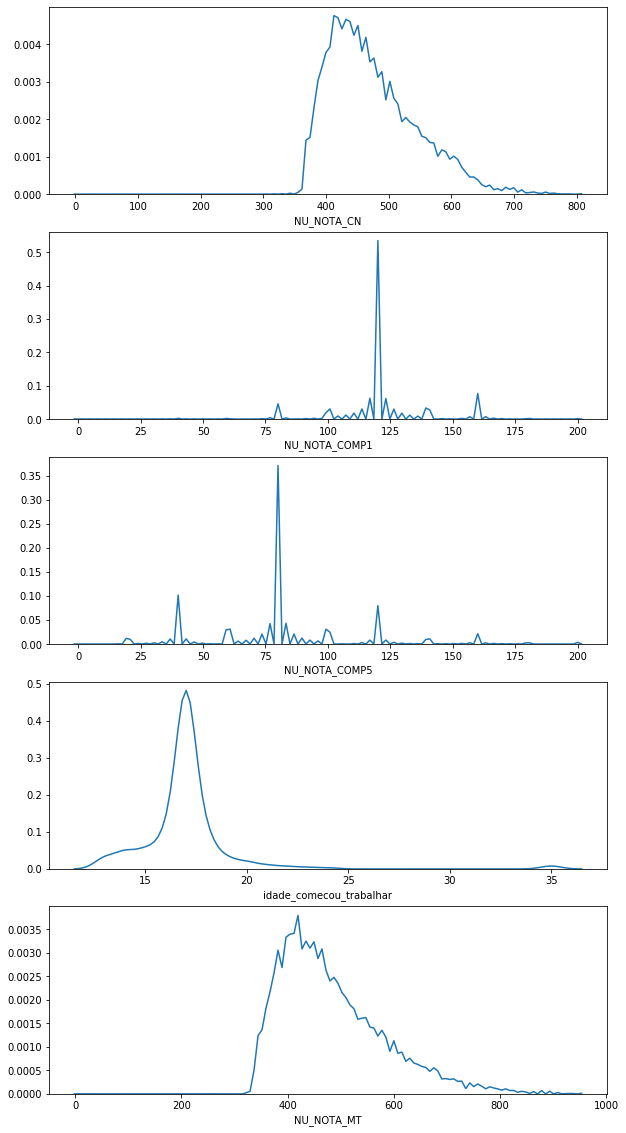

In [14]:
eda_numericas = df3[df3['NU_NOTA_MT']!=99999].select_dtypes('float64')

fig, ax = plt.subplots(5,1,figsize=(10,20))
for i, col in enumerate(eda_numericas ):
    plt.subplot(5,1,i+1)
    plt.xlabel(col, fontsize=10)
    sns.kdeplot(eda_numericas[col].values,bw=0.5)
plt.show() 

### 5.2) Relação entre variáveis categoricas e o Target

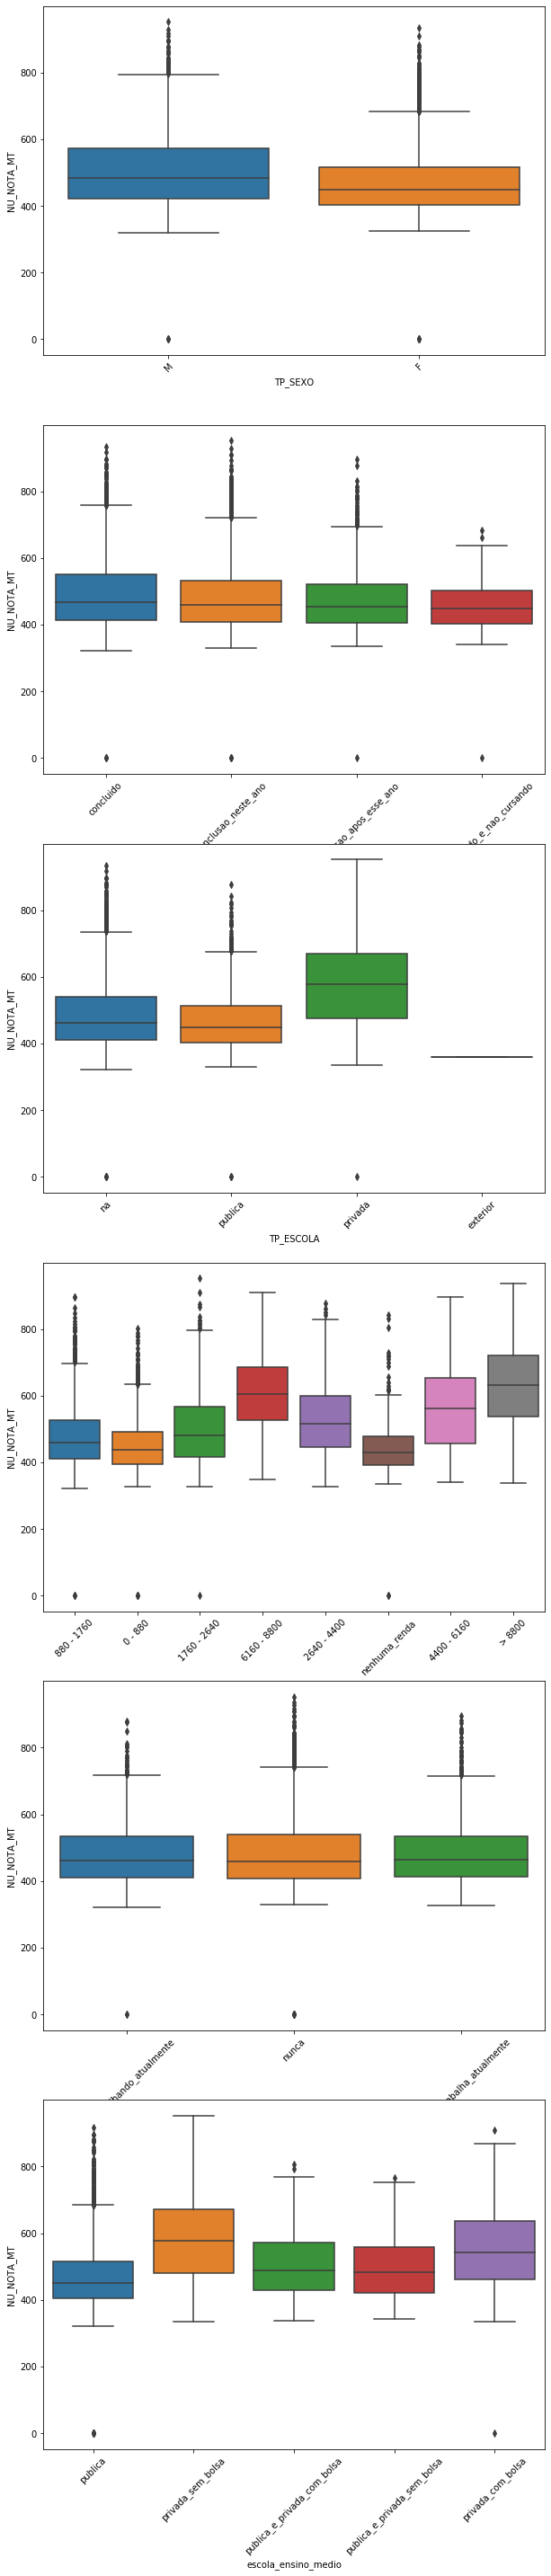

In [15]:
df2 = df2[df2['NU_NOTA_MT']!=99999]

categoricas = ['TP_SEXO','TP_ST_CONCLUSAO','TP_ESCOLA'
               ,'renda_familiar','trabalha_ou_trabalhou','escola_ensino_medio']

categorical = df2[categoricas]

fig, ax = plt.subplots(6,1,figsize=(10,50))

for i, col in enumerate(categorical):
    plt.subplot(6,1,i+1)
    plt.xlabel(col, fontsize=10)
    sns.boxplot(x=categorical.columns[i], y = df2['NU_NOTA_MT'], data=categorical, dodge=False)
    plt.xticks(rotation=45)
plt.show() 

### Divisão da base em Explicativas e Target
x = variaveis explicativas da base

y = Nota do enem na base 

x_valid = variaveis explicativas da base de validação

In [34]:
train = df3[df3['NU_NOTA_MT']!=99999]
x = train.drop(columns=['NU_NOTA_MT','NU_INSCRICAO','CO_UF_RESIDENCIA'])
y = train[['NU_NOTA_MT','NU_INSCRICAO']]

#Valid + submission
x_valid = df3[df3['NU_NOTA_MT']==99999]
x_valid = x_valid.drop(['NU_NOTA_MT'],axis=1)

submission = x_valid['NU_INSCRICAO'].to_frame()

### 6) Feature Selection
Nessa fase iremos abordar 3 tipo diferentes de seleção de variáveis que são o método baseado em filtro, wrapper e embedded. Após isso, vamos unir todos as features selecionadas em cada algoritimo e realizar um processo de voting, onde vamos escolher quais variaveis explicativas iremos escolher para fazer parte do modelo

### 6.1) Feature Selection - Baseado em Filtro (SelectKbest )

In [21]:
f_selector = SelectKBest(f_regression, k=20)

f_selector.fit(x,y['NU_NOTA_MT'])

#Traz um boolean de quem entrou e quem não entrou
f_support =  f_selector.get_support()
f_support

f_feature = x.loc[:,f_support].columns.tolist()
print(str(len(f_feature)), "São as variáveis selecionadas ")
print(f_feature)

20 São as variáveis selecionadas 
['NU_IDADE', 'TP_ST_CONCLUSAO_concluido', 'TP_ST_CONCLUSAO_conclusao_neste_ano', 'TP_ST_CONCLUSAO_nao_concluido_e_nao_cursando', 'TP_ANO_CONCLUIU_0.0', 'TP_ANO_CONCLUIU_nan', 'TP_ESCOLA_na', 'TP_ESCOLA_privada', 'TP_ENSINO_nan', 'TP_ENSINO_ensino_regular', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'TP_STATUS_REDACAO_sem_problemas', 'TP_STATUS_REDACAO_nan', 'trabalha_ou_trabalhou_sim_nao_trabalha_atualmente', 'trabalha_ou_trabalhou_nunca', 'escola_ensino_medio_publica', 'escola_ensino_medio_privada_sem_bolsa']


### 6.2) Feature Selection - Baseada em wrapper
Utilizando Gradient Boosting Regressor

In [24]:
wrapper = GradientBoostingRegressor(n_estimators = 50)
rfecv = RFECV(estimator=wrapper, step=1, cv=5,scoring='neg_mean_squared_error')  
rfecv = rfecv.fit(x,y['NU_NOTA_MT'])

rfe_support = rfecv.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), "São as variáveis selecionadas ")
print(rfe_feature)

28 São as variáveis selecionadas 
['SG_UF_RESIDENCIA_MG', 'NU_IDADE', 'TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA_branco', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'TP_LINGUA_ingles', 'TP_STATUS_REDACAO_sem_problemas', 'TP_STATUS_REDACAO_nan', 'NU_NOTA_COMP1', 'NU_NOTA_COMP5', 'serie_pai_estudou_6.0', 'serie_pai_estudou_7.0', 'serie_mae_estudou_2.0', 'serie_mae_estudou_5.0', 'serie_mae_estudou_6.0', 'renda_familiar_880 - 1760', 'renda_familiar_2640 - 4400', 'renda_familiar_0 - 880', 'renda_familiar_6160 - 8800', 'renda_familiar_> 8800', 'computador_em_casa_0.0', 'acesso_internet_1.0', 'idade_comecou_trabalhar', 'escola_ensino_medio_publica', 'escola_ensino_medio_privada_sem_bolsa']


### 6.3) Feature Selection - Baseada em Embedded

In [25]:
rf = RandomForestRegressor(random_state=42)
emb_selector = SelectFromModel(rf)
emb_selector.fit(x,y['NU_NOTA_MT'])

emb_suppport = emb_selector.get_support()
emb_feature = x.loc[:,emb_suppport].columns.tolist()
print(str(len(emb_feature)), "São as variáveis selecionadas ")
print(emb_feature)

3 São as variáveis selecionadas 
['TP_PRESENCA_LC', 'NU_NOTA_CN', 'TP_STATUS_REDACAO_nan']


### Comparando métodos de Features selection

In [26]:
#Comparando
feature_selection_df = pd.DataFrame({'Variáveis':x.columns,
                                     'F-regression':f_support,
                                     'RFE':rfe_support,
                                     'RandomForestRegressor':emb_suppport})

#Count de quanto foi selecionado para cada algortimo
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#Print decrescente
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'] , ascending=False)
feature_selection_df

,Variáveis,F-regression,RFE,RandomForestRegressor,Total
81,TP_STATUS_REDACAO_nan,True,True,True,3
76,TP_PRESENCA_LC,True,True,True,3
77,NU_NOTA_CN,True,True,True,3
127,escola_ensino_medio_publica,True,True,False,2
128,escola_ensino_medio_privada_sem_bolsa,True,True,False,2
80,TP_STATUS_REDACAO_sem_problemas,True,True,False,2
74,TP_PRESENCA_CN,True,True,False,2
27,NU_IDADE,True,True,False,2
124,trabalha_ou_trabalhou_sim_nao_trabalha_atualmente,True,False,False,1
125,trabalha_ou_trabalhou_nunca,True,False,False,1


### Filtro da variáveis mais importantes
Com base nos 3 métodos de feature selection, vou incluir apenas as variáveis que obtiveram presença em um ou mais métodos

In [32]:
melhores_features = list(feature_selection_df[feature_selection_df.Total>=1]['Variáveis'])
print(melhores_features)

['TP_STATUS_REDACAO_nan', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'escola_ensino_medio_publica', 'escola_ensino_medio_privada_sem_bolsa', 'TP_STATUS_REDACAO_sem_problemas', 'TP_PRESENCA_CN', 'NU_IDADE', 'trabalha_ou_trabalhou_sim_nao_trabalha_atualmente', 'trabalha_ou_trabalhou_nunca', 'serie_pai_estudou_7.0', 'serie_pai_estudou_6.0', 'serie_mae_estudou_6.0', 'serie_mae_estudou_5.0', 'serie_mae_estudou_2.0', 'renda_familiar_> 8800', 'renda_familiar_880 - 1760', 'renda_familiar_6160 - 8800', 'renda_familiar_2640 - 4400', 'renda_familiar_0 - 880', 'idade_comecou_trabalhar', 'computador_em_casa_0.0', 'acesso_internet_1.0', 'TP_ST_CONCLUSAO_nao_concluido_e_nao_cursando', 'TP_ST_CONCLUSAO_conclusao_neste_ano', 'TP_ST_CONCLUSAO_concluido', 'TP_SEXO_M', 'TP_SEXO_F', 'TP_PRESENCA_CH', 'TP_LINGUA_ingles', 'TP_ESCOLA_privada', 'TP_ESCOLA_na', 'TP_ENSINO_nan', 'TP_ENSINO_ensino_regular', 'TP_COR_RACA_branco', 'TP_ANO_CONCLUIU_nan', 'TP_ANO_CONCLUIU_0.0', 'SG_UF_RESIDENCIA_MG', 'NU_NOTA_COMP5', 'NU_NOTA_C

In [35]:
x = x[melhores_features]
x_valid = x_valid[melhores_features]

In [36]:
print('treino',x.shape)
print('treino',x_valid.shape)

treino (14925, 40)
treino (3381, 40)


### Divisão da base em treino e teste
Nessa fase iremos dividir em 30% da base para teste e 70% da base para treino

In [60]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x
                                                      ,y
                                                      ,test_size=0.3
                                                      ,random_state=42)

### 7) Modelagem

Nessa fase vamos testar alguns algoritmos de machine learning para prever o nosso target.

Foi utilizado o randomized search como otimizador dos hiperparametros devido a sua velocidade comparado com o método de gridsearch

#### 7.1) Random Forest Regressor com tuning do hiperparametros (Random Search)

In [39]:
#Dicionario
rf_grid_dc = {
    'n_estimators': [100,300,500],
    'bootstrap':[True,False],
    'max_depth':[4,5,6]
}

rf_grid =RandomForestRegressor(random_state=42)
rf_randomized = RandomizedSearchCV (rf_grid,
                       rf_grid_dc,
                       n_iter=10,
                       cv=5)

rf_randomized.fit(x_treino,y_treino['NU_NOTA_MT'])

p = rf_randomized.predict(x_teste) 


r2_rf = r2_score(y_teste['NU_NOTA_MT'], p)
mse_rf = mean_squared_error(y_teste['NU_NOTA_MT'], p)

print(('R2 de teste',r2_rf))
print('MSE de teste',mse_rf)

print('best_params:',rf_randomized.best_params_)

('R2 de teste', 0.9320622793320589)
MSE de teste 3943.044198182385
best_params: {'n_estimators': 300, 'max_depth': 6, 'bootstrap': True}


#### 7.2) Gradient Boosting Regressor com tuning de hiperparametro (Random Search)

In [40]:
#Dicionario
gb_grid_dc = {
    'n_estimators': [100,200,300],
    'subsample': [0.7,0.8],
    'max_features':[5,6,7],
    'max_depth':[3,4,5,6]
}


gb_grid = GradientBoostingRegressor(random_state=42)
gb_randomized = RandomizedSearchCV (gb_grid,
                       gb_grid_dc,
                       n_iter=10,
                       cv=5)

gb_randomized.fit(x_treino,y_treino['NU_NOTA_MT'])

p2 = gb_randomized.predict(x_teste) 

r2_gb = r2_score(y_teste['NU_NOTA_MT'], p2)
mse_gb = mean_squared_error(y_teste['NU_NOTA_MT'], p2)

print('R2 de teste',r2_gb)
print('MSE de teste',mse_gb)

print('best_params:',gb_randomized.best_params_)

R2 de teste 0.9340895639851445
MSE de teste 3825.3824204420907
best_params: {'subsample': 0.8, 'n_estimators': 300, 'max_features': 6, 'max_depth': 3}


### 7.3) Support Vector Machine com tuning de hiperparametro
Para utilização desse algoritmo vamos utilizar apenas as variáveis numéricas e além disso vamos padroniza-las

In [49]:
#Seleção das variaveis numericas
x = train.drop(columns=['NU_NOTA_MT','NU_INSCRICAO','CO_UF_RESIDENCIA'])
x_valid = df3[df3['NU_NOTA_MT']==99999]
x_valid = x_valid.drop(['NU_NOTA_MT'],axis=1)

features_numericas_sem_multicolienaridade = x.select_dtypes('float64').columns

x = x[features_numericas_sem_multicolienaridade]
x_valid = x_valid[features_numericas_sem_multicolienaridade]

In [50]:
#Padronização das variaveis numericas
#standard features
scaler_treino = sklearn.preprocessing.StandardScaler().fit(x[features_numericas_sem_multicolienaridade])
x[features_numericas_sem_multicolienaridade]= scaler_treino.transform(x[features_numericas_sem_multicolienaridade])

scaler_valid = sklearn.preprocessing.StandardScaler().fit(x_valid[features_numericas_sem_multicolienaridade])
x_valid[features_numericas_sem_multicolienaridade]= scaler_valid .transform(x_valid[features_numericas_sem_multicolienaridade])

In [51]:
#redivisão em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x
                                                      ,y
                                                      ,test_size=0.3
                                                      ,random_state=42)

In [52]:
#Dicionário
svm_grid_dc = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}


svm_grid = SVR()
svm_randomized = RandomizedSearchCV (svm_grid,
                       svm_grid_dc,
                       n_iter=10,
                       cv=5)

svm_randomized.fit(x_treino,y_treino['NU_NOTA_MT'])

p3 = svm_randomized.predict(x_teste)

r2_svm = r2_score(y_teste['NU_NOTA_MT'], p3)
mse_svm = mean_squared_error(y_teste['NU_NOTA_MT'], p3)

print('R2 de teste',r2_svm)
print('MSE de teste',mse_svm)
print('best_params:',svm_randomized.best_params_)

R2 de teste 0.848113144305518
MSE de teste 8815.376483610873
best_params: {'gamma': 1, 'C': 10}


### 7.4) Regressão Linear com penalização L1 ( Ridge)

In [53]:
#Dicionário
#rl_grid_dc = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

rl_grid_dc = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}

rl_ridge_grid = Ridge()

rl_ridge_randomized = RandomizedSearchCV (rl_ridge_grid,
                       rl_grid_dc,
                       n_iter=10,
                       cv=5)


rl_ridge_randomized.fit(x_treino,y_treino['NU_NOTA_MT'])

p4 = rl_ridge_randomized.predict(x_teste)

r2_ridge = r2_score(y_teste['NU_NOTA_MT'], p4)
mse_ridge = mean_squared_error(y_teste['NU_NOTA_MT'], p4)

print('R2 de teste',r2_ridge)
print('MSE de teste',mse_ridge)
print('best_params:',rl_ridge_randomized.best_params_)

R2 de teste 0.8367101593009236
MSE de teste 9477.195476392355
best_params: {'alpha': 1}


### 8) Avaliação dos resultados

In [54]:
modelos = pd.DataFrame(pd.DataFrame({
    'Modelo': ['Random Forest','Gradient Boosting', 'SVM','Ridge Regression'],
    'R2': [r2_rf,r2_gb,r2_svm,r2_ridge],   
    'Mean Squared Error': [mse_rf,mse_gb,mse_svm,mse_ridge]}))

modelos

,Modelo,R2,Mean Squared Error
0,Random Forest,0.932062,3943.044198
1,Gradient Boosting,0.934090,3825.382420
2,SVM,0.848113,8815.376484
3,Ridge Regression,0.836710,9477.195476


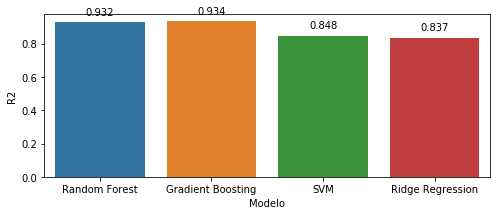

In [55]:
plt.figure(figsize=(8, 3))

grafico = sns.barplot(data= modelos,
                    x=modelos.Modelo,
                    y=modelos['R2'])

for p in grafico.patches:
    grafico.annotate(format(p.get_height(), '.3f')
                   , (p.get_x() + p.get_width() / 2., p.get_height())
                   , ha = 'center'
                   , va = 'center'
                   , xytext = (0, 10)
                  , textcoords = 'offset points')


### Submetendo o Desafio

In [71]:
melhores_features = list(feature_selection_df[feature_selection_df.Total>=1]['Variáveis'])
x_valid = df3[df3['NU_NOTA_MT']==99999]
x_valid = x_valid[melhores_features]
NU_INSCRICAO = gb_randomized.predict(x_valid)
submission['NU_NOTA_MT'] = NU_INSCRICAO  
submission['NU_INSCRICAO'] = submission['NU_INSCRICAO']
submission.to_csv('answer.csv' , index=False)